In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [50]:
train=pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

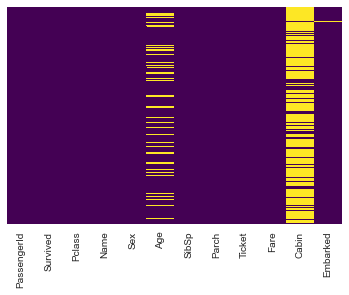

In [52]:
'''
we are missing Age and Cabin information
'''
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

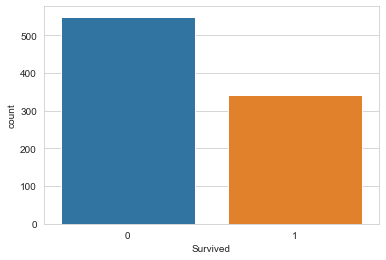

In [53]:
'''
More than 500 people did not survived than 300 survived 
'''
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Survived', ylabel='count'>

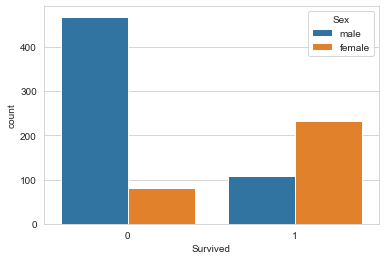

In [54]:
'''
People that did not survived are much more likely to male thna female
'''
sns.countplot('Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

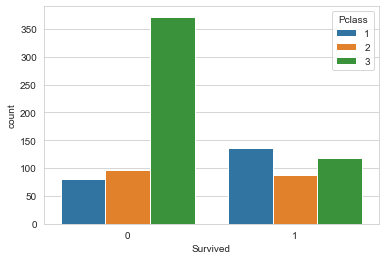

In [55]:
'''
people who did not survived is 3rd class in majority
'''
sns.countplot(x='Survived',data=train,hue="Pclass")

<AxesSubplot:xlabel='Age', ylabel='Count'>

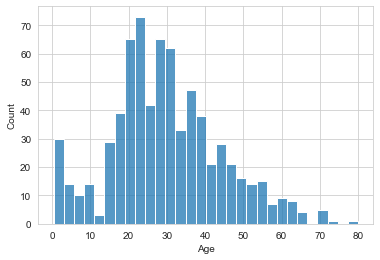

In [56]:
'''
Most people who is having age between 20-30 is onboard and some children between 0-10
'''
sns.histplot(train['Age'],kde=False,bins=30)

<AxesSubplot:ylabel='Frequency'>

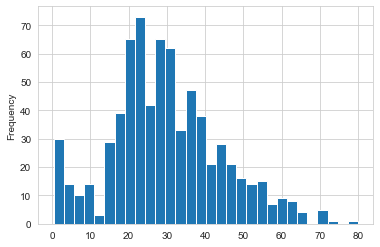

In [57]:
train['Age'].plot.hist(bins=30)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

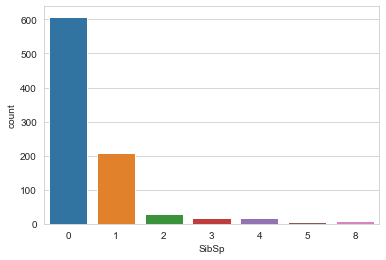

In [59]:
'''
Most onboard people does not have children or spouse onbard
'''
sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

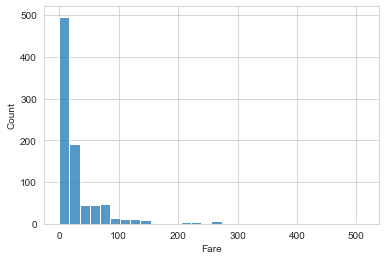

In [60]:
'''
Most of the fare in between 0-100$, as more 3rd class people onboard so less fare range
'''
sns.histplot(train["Fare"],kde=False,bins=30)

In [61]:
import  cufflinks as cf

In [62]:
cf.go_offline()

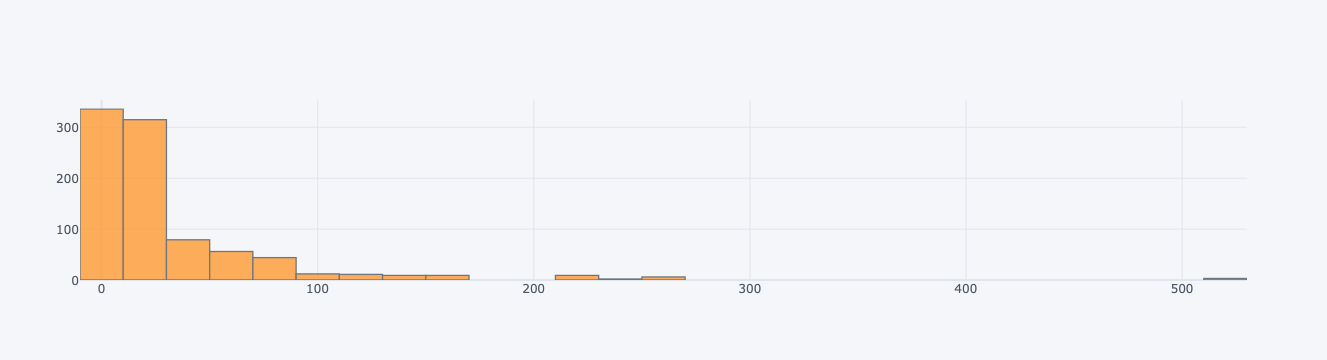

In [63]:
train["Fare"].iplot(kind="hist",bins=50)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

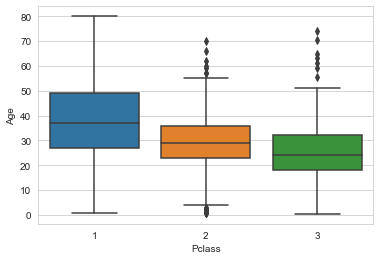

In [64]:
'''
First Class Passenger is bit older than 3rd class passenger
'''
sns.boxplot(x='Pclass',y='Age',data=train)

In [65]:
'''
Impute this average age to fill the missing value of Age coloumn
'''
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 27
        else:
            return 24
    else:
        return Age
    
    

In [66]:
'''
we take 2 coloum of dataframe and apply function pass this two coloumn to impute_age function
'''
train['Age']=train[["Age","Pclass"]].apply(impute_age,axis=1)

<AxesSubplot:>

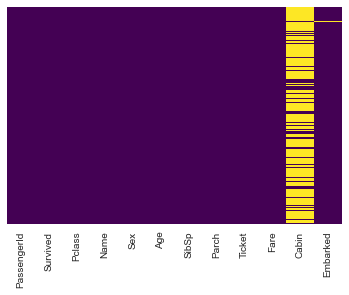

In [67]:
'''
No longer is having missing information of the Age as we replce it by avarage value of passenger by class
'''
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [68]:
train.drop("Cabin",axis=1,inplace=True)

<AxesSubplot:>

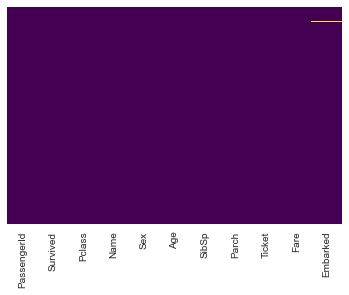

In [69]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [70]:
'''
Just drop sigle missing value from Embarker coloumn
'''
train.dropna(inplace=True)

<AxesSubplot:>

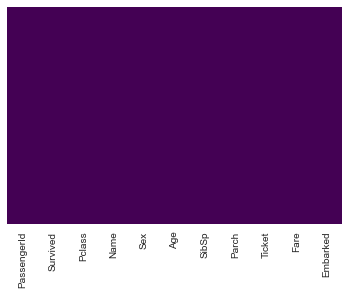

In [71]:
'''
We dont have any missing value
'''
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [72]:
'''
Famale coloum is perfect predictor of male cloumn i.e female=0 then male=1
This will cause multi colinearity so we drop first column
'''
pd.get_dummies(train["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [73]:
sex=pd.get_dummies(train["Sex"],drop_first=True)

In [74]:
embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [75]:
train=pd.concat([train,sex,embarked],axis=1)

In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [77]:
'''
As coloumn so axis=1
'''
train.drop(['Sex',"Embarked",'Name',"Ticket"],axis=1,inplace=True)

In [78]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [79]:
train.drop(["PassengerId"],axis=1,inplace=True)

In [80]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [81]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [87]:
logmodel=LogisticRegression()

In [88]:
logmodel.fit(X_train,y_train)

/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [89]:
prediction=logmodel.predict(X_test)

In [92]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [94]:
print(confusion_matrix(y_test,prediction))

[[149  14]
 [ 31  73]]
